In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from PIL import Image

In [5]:
from tensorflow.keras.utils import to_categorical # to convert labels to one hot encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense,Flatten, Dropout

In [6]:
data=[]
labels=[]
classes=43
cur_path=os.getcwd()
for i in range(classes):
    path=os.path.join(cur_path,'/media/dhananjay/Volume A/Project/Traffic sign/train',str(i))
    images=os.listdir(path)
    for a in images:
        try:
            image=Image.open(path + '/' + a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
              print("Error loading image")
data=np.array(data)
labels=np.array(labels)                             
                             

In [7]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
print(X_train.shape[1:])

(30, 30, 3)


In [10]:
# convert labels to one hot encoding
y_train=to_categorical(y_train, 43)
y_test=to_categorical(y_test, 43)

In [11]:
# model building section

In [12]:
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


2022-10-13 14:12:47.316533: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-13 14:12:47.336754: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 14:12:47.452916: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [13]:
# compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs=5
history=model.fit(X_train,y_train, batch_size=32, epochs=epochs, validation_data=(X_test,y_test))

2022-10-13 14:12:48.742155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-13 14:12:48.838613: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1190400000 Hz


Epoch 1/5
981/981 [==============================] - 81s 80ms/step - loss: 3.5202 - accuracy: 0.3170 - val_loss: 0.2902 - val_accuracy: 0.9309
Epoch 2/5
981/981 [==============================] - 76s 77ms/step - loss: 0.5378 - accuracy: 0.8424 - val_loss: 0.0937 - val_accuracy: 0.9772
Epoch 3/5
981/981 [==============================] - 76s 77ms/step - loss: 0.2993 - accuracy: 0.9121 - val_loss: 0.0673 - val_accuracy: 0.9819
Epoch 4/5
981/981 [==============================] - 76s 78ms/step - loss: 0.2228 - accuracy: 0.9387 - val_loss: 0.0476 - val_accuracy: 0.9880
Epoch 5/5
981/981 [==============================] - 70s 72ms/step - loss: 0.1856 - accuracy: 0.9491 - val_loss: 0.0859 - val_accuracy: 0.9796


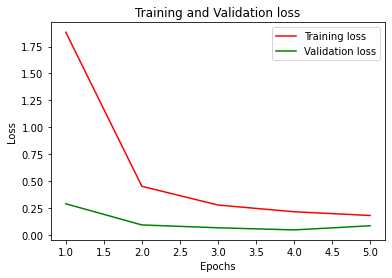

In [15]:
# ploting Training Loss and Validation loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'g', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

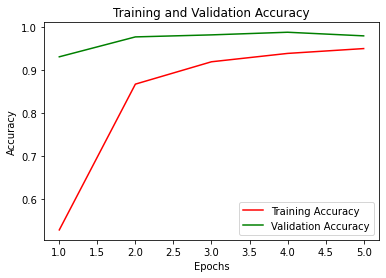

In [29]:
# Ploting Training and Validation Accuracy
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(1,6)
plt.plot(epochs, acc_train, 'r', label='Training Accuracy')
plt.plot(epochs, acc_val, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
 #def rm_green(pathOut):
   # for f in os.getcwd():
     #   file_path = os.path.abspath(os.path.join(pathOut, f))
   #     if f[-3:] == "png":         
    #        name, ext = os.path.splitext(f)
       #     im = Image.open(file_path)

In [18]:
# Model Testing
#test_df=pd.read_csv('/media/dhananjay/Volume A/Project/Traffic sign/Test.csv')
#labels=test_df['ClassId'].values
#imgs=test_df['Path'].values
#data=[]
# for img in imgs:
  #  image =Image.open(img)
   # image=image.resize((30,30))




    


In [19]:
test_df=pd.read_csv('/media/dhananjay/Volume A/Project/Traffic sign/Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [20]:
labels=test_df['ClassId'].values
imgs=test_df['Path'].values
test_data=[]
for img in imgs:
    image=Image.open('/media/dhananjay/Volume A/Project/Traffic sign'+'/'+img, mode='r')
    image=image.resize((30,30))
    test_data.append(np.array(image))
    

In [21]:
X_test=np.array(test_data)
pred = model.predict_classes(X_test)

/home/dhananjay/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9478226444972289
